# NPTracer Tutorial

Welcome to **N**-body **P**article **Tracer** (NPTracer), the package that will solve all your headaches from manipulating the outputs of N-body simulations for planet formation. 

In this guide you will learn how to use NPTracer and get the data ready for making beautiful plots. By this point you should have installed NPTracer, if not follow the instructions in **link to README**. The only package from NPTracer you will need to import is the *Driver*, it will handle the reading and analysis of the data for you.

In [1]:
from nptracer.driver import Driver

Let's say that we want to read and analyze the snapshots from a N-body simulation with GENGA (link to GENGA documentation and paper). If you dont have GENGA data, no worries, we have some data we generated for this tutorial. To instantitate this object you only will need to degine the path the folder with the data, and a the keyword to indicate that the data the package will be ready is on the GENGA format.

In [2]:
path = 'simdata/genga/'
driver = Driver(path, 'genga')

Loaded table with 1994 rows and 10 columns


Under the hood, the Driver object read the data with the Loader object, which give the cartesian coordinates, velocities, mass, radius of all the particles (idenfied by ids) in all epochs. The the Analyzer object transform all this data into Keplerian elements. The dataframe with all the data we can work to can be accessed through the following "data" attribute, let's see the columns:

In [3]:
driver.analyzer.data

,t,id,m,r,px,py,pz,vx,vy,vz,a,e,inc,asc_node,omega,M
0,0.000000,10,9.773571e-07,0.000036,0.118767,0.089014,0.000500,-0.434986,0.594105,-0.004975,0.149307,0.012633,0.007583,4.245059,1.587240,1.082825
1,0.000000,9,6.586735e-07,0.000031,0.148836,0.052840,-0.000308,-0.239056,0.666409,0.000859,0.156308,0.010935,0.002291,1.357255,1.823744,3.449878
2,0.000000,23,1.410008e-06,0.000041,-0.021591,-0.064846,0.000163,0.992859,-0.360378,0.003131,0.065285,0.053982,0.003754,3.703495,4.321262,2.623900
3,0.000000,22,1.977740e-07,0.000021,-0.116791,0.088365,0.010029,-0.431348,-0.580408,0.004898,0.141095,0.041207,0.068765,1.030170,4.415477,3.347719
4,0.000000,20,1.049919e-06,0.000037,0.004875,-0.042437,0.000020,1.366030,0.139696,0.002131,0.043008,0.014181,0.001615,4.532888,5.492601,1.071911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,73921.971253,23,2.320884e-06,0.000048,0.007270,0.064262,0.012615,-1.025100,0.242198,0.059177,0.060823,0.151891,0.195341,0.055886,5.414666,2.158066
1990,73921.971253,20,2.977838e-06,0.000052,0.041732,0.009862,-0.002643,-0.269286,1.237940,-0.132391,0.038066,0.130869,0.119810,2.836242,0.701852,2.959300
1991,73921.971253,12,4.395171e-06,0.000059,0.019923,-0.007497,-0.000918,0.687368,1.819066,0.077163,0.021492,0.008657,0.058570,0.466214,5.496744,6.243334
1992,73921.971253,7,4.542146e-06,0.000060,0.086054,0.001046,0.001246,-0.013304,1.020967,-0.004882,0.097986,0.121617,0.015244,4.406381,1.897593,6.276451


Let's say we want to know the IDs of the particles that survive all the simulation:

In [4]:
driver.analyzer.ids_final

array([23, 20, 12,  7, 17])

If we want to plot the evolution of the mass of particle 20 throughout the simulation, we will simply query this data as:

In [5]:
time, m = driver.analyzer.get_time_prop(20, 'm')

Let's import our best friend matplotlib and make a plot with this data (we also use astropy to convert solar mass to earth mass)

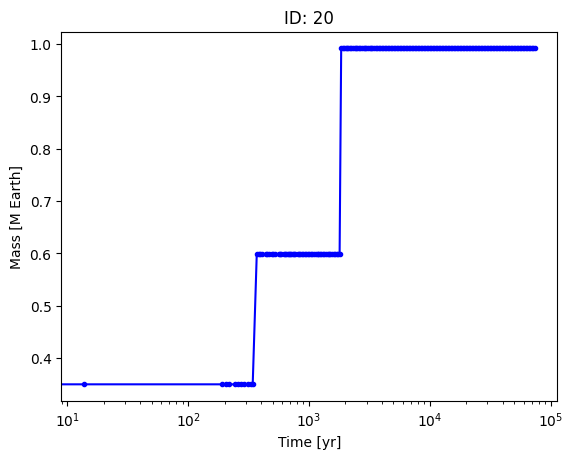

In [6]:
import matplotlib.pyplot as plt
from astropy import units as u

fig, ax = plt.subplots()
ax.plot(time, (m*u.M_sun).to(u.M_earth), '.-', c='b')
ax.set_xlabel('Time [yr]'); ax.set_ylabel('Mass [M Earth]'); ax.set_title(f'ID: 20')
ax.set_xscale('log')


We see that particle 20 underwent 3 collision and a final mass of 1 M Earth! Now let's plot radius, semimajor axis and eccentricity for all particles that survived the simulation.

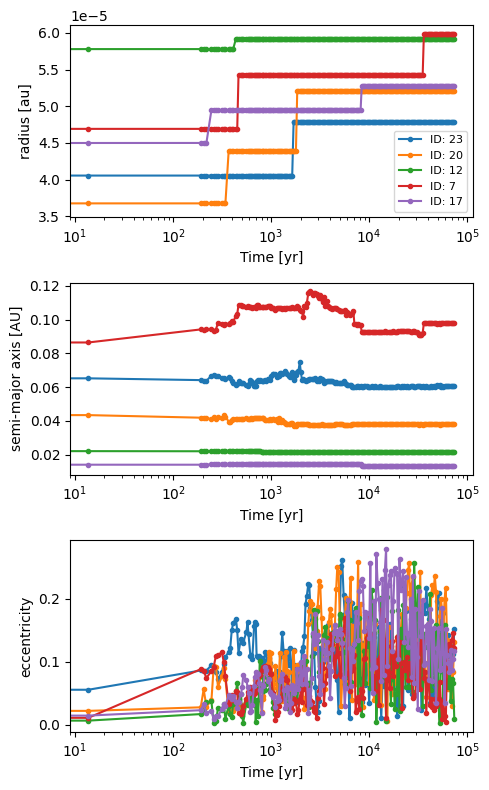

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(5, 8))
for i, (prop, ylabel) in enumerate(zip(['r', 'a', 'e'], ['radius [au]', 'semi-major axis [AU]', 'eccentricity'])):
    for id in driver.analyzer.ids_final:
        time4plot, prop4plot = driver.analyzer.get_time_prop(id, prop)
        ax[i].plot(time4plot, prop4plot, '.-', label=f'ID: {id}')
        ax[i].set_xlabel('Time [yr]'); ax[i].set_ylabel(ylabel); 
        ax[i].set_xscale('log')
ax[0].legend(fontsize=8)
plt.tight_layout()


The analyzer object also have a method to give us the maximum/minimum/mean/median value of a variable throughout the epochs of the simulations. So let's see and plot how the maximum mass of the system evolves over time and compare it with the average

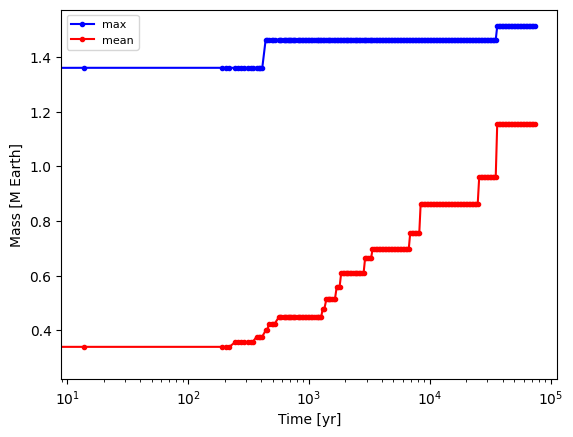

In [8]:
time, max_m = driver.analyzer.get_time_func('m', 'max')
time, mean_m = driver.analyzer.get_time_func('m', 'mean')

fig, ax = plt.subplots()
ax.plot(time, (max_m*u.M_sun).to(u.M_earth), '.-', c='b', label='max')
ax.plot(time, (mean_m*u.M_sun).to(u.M_earth), '.-', c='r', label='mean')
ax.set_xlabel('Time [yr]'); ax.set_ylabel('Mass [M Earth]'); 
ax.set_xscale('log');
ax.legend(fontsize=8)
plt.show()

GENGA is not the only format supported by NPTracker, we can also import ChaNGa as:

In [9]:
path = 'simdata/changa/'
driver = Driver(path, 'changa')

Loaded table with 88903 rows and 10 columns
